# Manual (Just copied from the lab manual)
-------------

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.io import imread, imshow


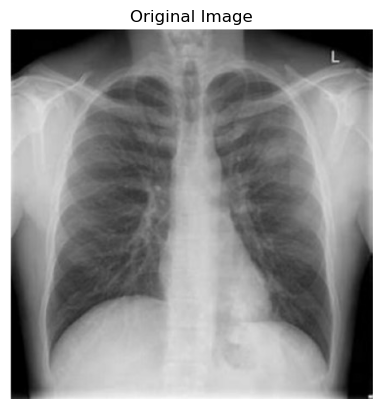

In [31]:
image = imread('lunar_orbiter.jpg')
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')
plt.show()

In [48]:
gray_image = rgb2gray(image)
f_image = np.fft.fft2(gray_image)
fshift = np.fft.fftshift(f_image)

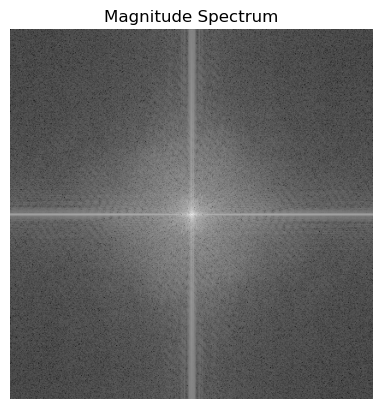

In [50]:
magnitude_spectrum = 20 * np.log(np.abs(fshift))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')
plt.show()


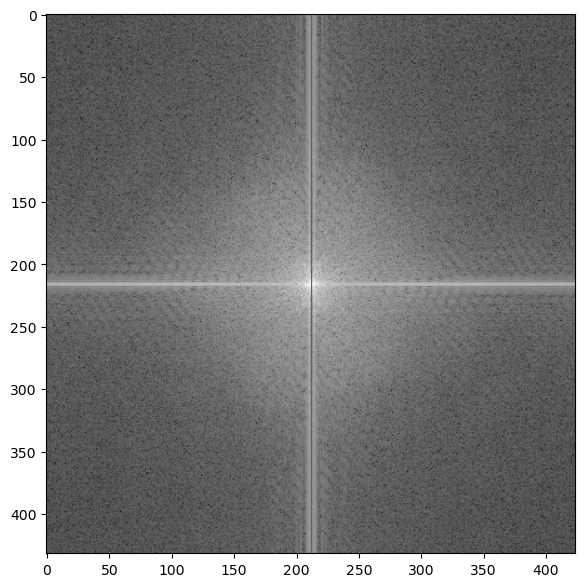

In [52]:
image_gray_fft2 = fshift.copy()
image_gray_fft2[:286, fshift.shape[1]//2] = 1
image_gray_fft2[-286:, fshift.shape[1]//2] = 1
plt.figure(figsize=(7,7))
plt.imshow(np.log(abs(image_gray_fft2)), cmap='gray');


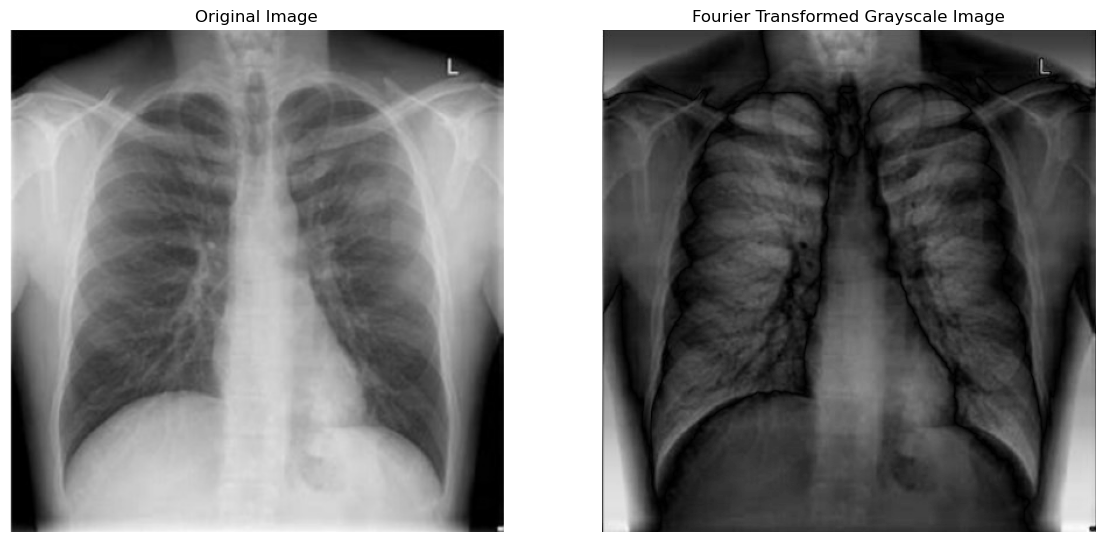

In [53]:
# Use Inverse Fourier Transform
inv_fshift = np.fft.ifftshift(image_gray_fft2)
filtered_gray_image = np.fft.ifft2(inv_fshift)
filtered_gray_image = np.abs(filtered_gray_image)

# Plot the original and fourier-transformed grayscale image
fig, ax = plt.subplots(1, 2, figsize=(14, 7))
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(filtered_gray_image, cmap='gray')
ax[1].set_title('Fourier Transformed Grayscale Image')
ax[1].axis('off')

plt.show()


In [55]:
transformed_channels = []
for i in range(3):
    rgb_fft = np.fft.fftshift(np.fft.fft2((image[:, :, i])))
    rgb_fft2 = rgb_fft.copy()
    
    # Use the same filters as the grayscale image, just change the variables
    rgb_fft2[:286, rgb_fft.shape[1]//2] = 1
    rgb_fft2[-286:, rgb_fft.shape[1]//2] = 1
    transformed_channels.append(abs(np.fft.ifft2(np.fft.ifftshift(rgb_fft2))))


In [57]:
filtered_rgb_image = np.dstack([transformed_channels[0], transformed_channels[1], transformed_channels[2]])
filtered_rgb_image = np.clip(filtered_rgb_image, 0, 255).astype(np.uint8)


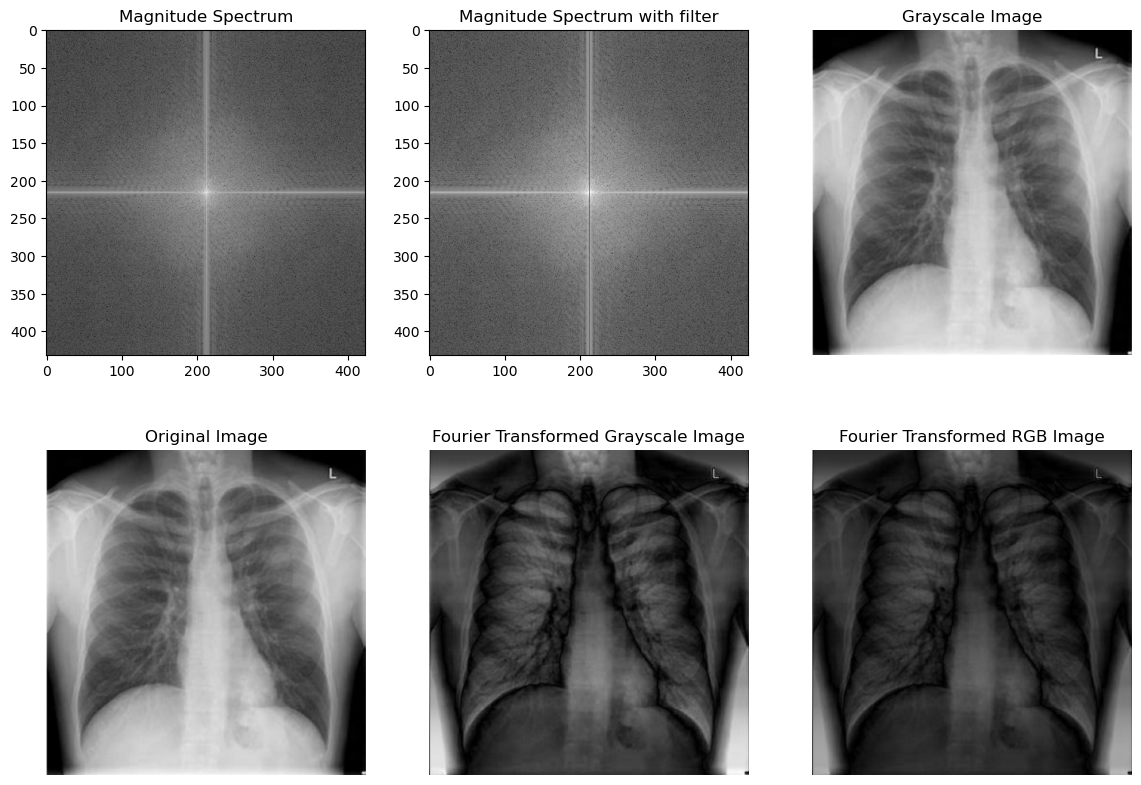

In [60]:
def plot_fourier_transformer(image, filtered_gray_image, filtered_rgb_image):
    
    if len(image.shape) == 2:
        image = np.stack((image, image, image), axis=-1)

    # Convert the image to grayscale
    gray_image = rgb2gray(image[:,:,:3])
    
    # Calculate the 2D Fourier transform and shift the zero-frequency components to the center
    f_image = np.fft.fft2(gray_image)
    fshift = np.fft.fftshift(f_image)
    magnitude_spectrum = 20 * np.log(np.abs(fshift))

    # Plot the images
    fig, ax = plt.subplots(2, 3, figsize=(14, 10))

    ax[0, 0].imshow(magnitude_spectrum, cmap='gray')
    ax[0, 0].set_title('Magnitude Spectrum')

    ax[0, 1].imshow(magnitude_spectrum, cmap='gray')
    ax[0, 1].imshow(np.log(abs(image_gray_fft2)), cmap='gray')
    ax[0, 1].set_title('Magnitude Spectrum with filter')

    ax[0, 2].imshow(gray_image, cmap='gray')
    ax[0, 2].set_title('Grayscale Image')
    ax[0, 2].set_axis_off()

    ax[1, 0].imshow(image)
    ax[1, 0].set_title('Original Image')
    ax[1, 0].set_axis_off()

    ax[1, 1].imshow(filtered_gray_image, cmap='gray')
    ax[1, 1].set_title('Fourier Transformed Grayscale Image')
    ax[1, 1].set_axis_off()

    ax[1, 2].imshow(filtered_rgb_image)
    ax[1, 2].set_title('Fourier Transformed RGB Image')
    ax[1, 2].set_axis_off()

    # Save the Fourier-transformed RGB image
    plt.savefig('filtered_rgb_image.png', dpi=300)
    plt.show()

plot_fourier_transformer(image, filtered_gray_image, filtered_rgb_image)


  # Assignment
  -------------------
  

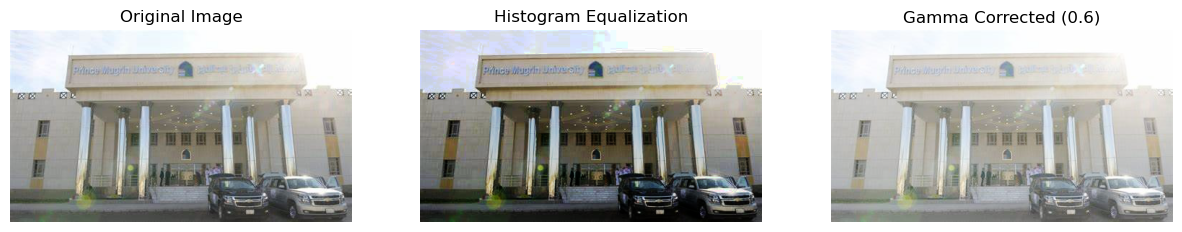

In [225]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure, img_as_float
from skimage.io import imread

image = imread('UPMpic.jpg')
image_float = img_as_float(image)

#Histogram Equalization
equalized_image = exposure.equalize_hist(image_float)

#Gamma Correction
gamma_value = 0.6 
gamma_image = exposure.adjust_gamma(image_float, gamma=gamma_value)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(equalized_image, cmap='gray')
axes[1].set_title('Histogram Equalization')
axes[1].axis('off')

axes[2].imshow(gamma_image, cmap='gray')
axes[2].set_title(f'Gamma Corrected ({gamma_value})')
axes[2].axis('off')

plt.show()


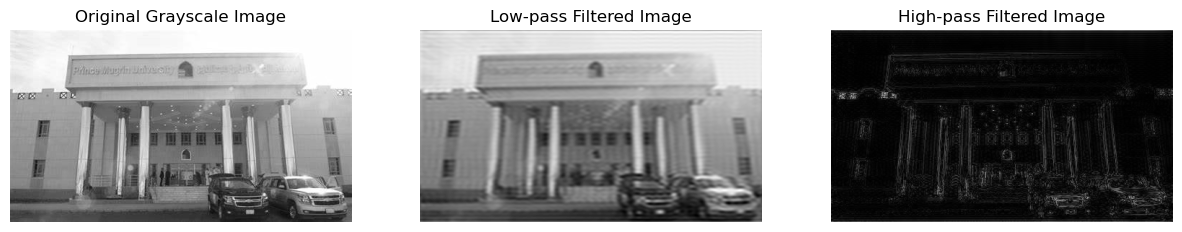

In [229]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2gray

image = imread('UPMpic.jpg')
gray_image = rgb2gray(image)

#Convert the image to the frequency domain
f_image = np.fft.fft2(gray_image)
fshift = np.fft.fftshift(f_image)

#Low-pass and High-pass filter masks
rows, cols = gray_image.shape
crow, ccol = rows // 2 , cols // 2 

#Create a low-pass filter
low_pass_filter = np.zeros((rows, cols), np.uint8)
radius = 45
low_pass_filter[crow-radius:crow+radius, ccol-radius:ccol+radius] = 1

#Create a high-pass filter
high_pass_filter = 1 - low_pass_filter

#Applying
fshift_low = fshift * low_pass_filter
fshift_high = fshift * high_pass_filter

#Inverse FFT to bring images back to the spatial domain
#Low-pass filtered image
f_ishift_low = np.fft.ifftshift(fshift_low)
img_back_low = np.fft.ifft2(f_ishift_low)
img_back_low = np.abs(img_back_low)

#High-pass filtered image
f_ishift_high = np.fft.ifftshift(fshift_high)
img_back_high = np.fft.ifft2(f_ishift_high)
img_back_high = np.abs(img_back_high)

#Save images
plt.imsave('low_pass_filtered_image.png', img_back_low, cmap='gray')
plt.imsave('high_pass_filtered_image.png', img_back_high, cmap='gray')

#Plot
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(gray_image, cmap='gray')
ax[0].set_title('Original Grayscale Image')
ax[0].axis('off')

ax[1].imshow(img_back_low, cmap='gray')
ax[1].set_title('Low-pass Filtered Image')
ax[1].axis('off')

ax[2].imshow(img_back_high, cmap='gray')
ax[2].set_title('High-pass Filtered Image')
ax[2].axis('off')

plt.show()
